# CHARGING DETAIL RECORDS


In this notebook we will do some **_data cleaning_** and **_exploratory data analysis_** on the CDR dataset, part of the full dataset provided for the FreeToX project. CDR stands indeed for Charging Detail Records. 

# TASK 1
Our goal for now is to **_understand the data_** after appropriately cleaning it and **_define the buyer persona_** on a behavioural perspective.

We start by uploading the libraries we will be using and opening the dataset, while taking a glimpse at the most essential information (such as number of entries, number of columns, types and null values) using the *.info()* function and at the dataset itself using the *.head()* function.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


cdr_og = pd.read_csv('/Users/claudiacortese/Desktop/py/cdr.csv')


print(cdr_og.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   CDR ID                                  300000 non-null  int64  
 1   EVSE ID                                 300000 non-null  object 
 2   Operatore                               300000 non-null  object 
 3   Potenza (kW)                            300000 non-null  float64
 4   Station Nome                            300000 non-null  object 
 5   Station Città                           300000 non-null  object 
 6   Station Indirizzo                       300000 non-null  object 
 7   Data inizio                             300000 non-null  object 
 8   Ora inizio                              300000 non-null  object 
 9   Data fine                               300000 non-null  object 
 10  Ora fine                                3000

In [3]:
#with this cell we are adjusting the pandas display options in order to see all the columns displayed in the next cell
pd.set_option('display.max_columns', None)

In [4]:
cdr_og.head()

,CDR ID,EVSE ID,Operatore,Potenza (kW),Station Nome,Station Città,Station Indirizzo,Data inizio,Ora inizio,Data fine,Ora fine,Ricavi totali (€) (IVA esclusa),Ricavi Energia (€) (IVA esclusa),Energia (kWh),Ricavi Penalty Time (€) (IVA esclusa),Tempo Totale (min),Inizio penalty time,Contachilometri (Km),Auth ID,Auth ID.1,Partner session ID,Auth method,Tipo di presa,EMI3 ID,Type Status
0,813476,IT*F2X*EF2XITA2001*2,IT*EVY,300.0,Area di Servizio - Arda Est,Casa Nuova,A1 - Autostrada del Sole,2023-10-20,21:05:40,2023-10-20,21:22:15,0.00,0.00,31.812,0.0,16,0,-,NaN,ITEVYCZJQ2P15XK,8e97e9e5-ae3a-4547-8404-acaebf61162f,AUTH_REQUEST,COMBO,IT*ASP,public
1,899258,IT*F2X*EF2XITMXPC02*2,IT*EVY,300.0,Aeroporto - Malpensa Commerciale,Ferno,Malpensa Aeroporto,2024-01-16,08:24:33,2024-01-16,08:46:23,1.20,1.20,1.772,0.0,21,0,-,-,044265F2594A80,2df812f6-19a1-4a0f-9c45-61467e7b482a,AUTH_REQUEST,COMBO,IT*ASP,public
2,939082,IT*F2X*EF2XITB5102*1,IT*GES,300.0,Area di Servizio - Teano Ovest,Teano,Autostrada A1- Direzione Napoli Km 708,2023-07-01,02:02:27,2023-07-01,02:27:36,30.00,30.00,44.116,0.0,25,0,-,-,ITGESC2303SN7NP,a6b0b745-84f1-4c76-a534-d591425853da,AUTH_REQUEST,COMBO,IT*ASP,public
3,939083,IT*F2X*EF2XITA3001*2,DE*DMB,300.0,Area di Servizio - Secchia Est,Modena,Autostrada del Sole,2023-07-01,02:04:36,2023-07-01,02:11:01,7.93,7.93,11.656,0.0,6,0,-,-,DE-DMB-C00306779-0,1fa3b06c-ab5c-49c7-bd01-f48ca89cae19,AUTH_REQUEST,COMBO,IT*ASP,public
4,939084,IT*F2X*EF2XITLINC02*2,IT*BEC,300.0,Aeroporto - Linate Commerciale,Milano,Aeroporto Linate Commerciale,2023-07-01,02:08:22,2023-07-01,02:34:55,18.98,18.98,27.912,0.0,26,0,-,-,IT-BEC-C9121UFPU-L,2d76bf52-4bc9-4d4a-8d2d-8753465a319d,AUTH_REQUEST,COMBO,IT*ASP,public


In [5]:
cdr_og.isnull().sum()

CDR ID                                        0
EVSE ID                                       0
Operatore                                     0
Potenza (kW)                                  0
Station Nome                                  0
Station Città                                 0
Station Indirizzo                             0
Data inizio                                   0
Ora inizio                                    0
Data fine                                     0
Ora fine                                      0
Ricavi totali (€) (IVA esclusa)               0
Ricavi Energia (€) (IVA esclusa)              0
Energia (kWh)                                 0
Ricavi Penalty Time (€) (IVA esclusa)         0
Tempo Totale (min)                            0
Inizio penalty time                           0
Contachilometri (Km)                          0
Auth ID                                    6553
Auth ID.1                                     0
Partner session ID                      

We notice how the only two columns with NaN values are **Auth ID** and **EMI3 ID**, with respectively 6553 and 37040 NaN values, which do not represent a big percentage out of the 300000 total values, and can therefore just be dropped. 

On top of that, these two columns represent the _'ID used to authenticate the charging session'_ and _'Identifier for the charging infrastructure according to the EMI3 standard'_.
Therefore they might not be useful anyway to identify the buyer personas.

We also noticed from the .head() output that the columns 'Contachilometri (Km)' and 'Auth ID' have '-' values. Therefore, it's appropriate to see what kind of values do the columns have, not only to find these types of values but also to highlight outliers and overall better understand the data.

In [6]:
for column in cdr_og:
    print(cdr_og[column].value_counts())

CDR ID
813476     1
1506472    1
1506504    1
1506503    1
1506500    1
          ..
1159662    1
1159661    1
1159659    1
1159658    1
1766361    1
Name: count, Length: 300000, dtype: int64
EVSE ID
IT*F2X*EF2XITA3001*1     2618
IT*F2X*EF2XITA2002*1     2337
IT*F2X*EF2XITA2002*2     2307
IT*F2X*EF2XITA2001*1     2294
IT*F2X*EF2XITD5102*1     2246
                         ... 
IT*F2X*EF2XITW3051*2        3
IT*F2X*EF2XITA2551*2        2
IT*F2X*EITDGRM00001*1       2
IT*F2X*EF2XITO2051*1        2
IT*F2X*EF2XITB5751*2        1
Name: count, Length: 681, dtype: int64
Operatore
IT*ENE    75816
IT*BEC    73743
IT*AES    30017
DE*DCS    25142
IT*GES    17873
          ...  
IT-FLY        1
FR*STE        1
NO-NEF        1
IT-KIW        1
FR*BOL        1
Name: count, Length: 83, dtype: int64
Potenza (kW)
300.0    270992
62.5      11453
22.0      10986
400.0      5513
150.0       948
50.0        108
Name: count, dtype: int64
Station Nome
Aeroporto - Linate Commerciale                    14091
Are

We can see that **'Ricavi Penalty Time'**, earnings from penalty time, is equal to 0 for each row, which is not giving us any info other than no one was charged a penalty, if penalties were applied. _Therefore we can drop this column._


Same reasoning goes for **'Inizio Penalty Time'**, beginning of penalty time, which is equal to 0 for all the rows. 


The row **'Contachilometri (Km)'** has only 20 real values different from '-', which are not enough to be analyzed and understood in the perception of the buyer persona, therefore it's only reasonable to drop the column as well.


We adopt the same approach for **'Auth ID'** as well, since only 2 values are not '-'. 


We will drop columns **'Auth ID', 'Auth ID.1' and 'Partner Session ID'** because by definition they don't contribute in any way to the definition of the buyer persona on a behavioural perspective. Let's see their descriptions to better understand our decision:
_Auth ID_: ID used to authenticate the charging session.
_Auth ID.1_: Alternative or additional authentication ID, if applicable.
_Partner Session ID_: Session ID provided by the roaming partner or external network.


**'Auth method'** displays 300.000 AUTH_REQUEST, which either means that the same authentication method was used for the 300.000 charges or simply there was something wrong in the detection phase. Either way, we can take note of this information, but at the same time it won't be useful for the clustering since it stays the same for every record.


The column **'EMI3 ID'** _can also be dropped_ since it detects the 'Identifier for the charging infrastructure according to the EMI3 standard'. Once again, this piece of information is not relevant to our study.


The last column, **'Type Status'**, is also irrelevant to the study, since it describes the type of Charging Point, which is clearly public for every record since all the charges recorded were done in FreeToX charging stations. Therefore, we can also drop this column.

We also check for duplicates in the _'CDR ID'_ column to see if any record was mistakenly duplicated/noted twice.

In [7]:
print (cdr_og.duplicated('CDR ID').sum())


0


Once we established that there are no duplicates, we can proceed to drop the columns that are not relevant to our study.

In [8]:
#we first make a copy of cdr since this info we're deleting might be useful later in the project
cdr = cdr_og.copy()

In [9]:
#I wasn't initially able to drop the columns due to a KeyError related to the Ricavi Penalty Time (€) (IVA esclusa) column. 
# Thanks to this cell I found out that the column name actually included a space that I didn't know was there and wouldn't let me drop the columns.
cdr.columns

Index(['CDR ID', 'EVSE ID', 'Operatore', 'Potenza (kW)', 'Station Nome',
       'Station Città', 'Station Indirizzo', 'Data inizio', 'Ora inizio',
       'Data fine', 'Ora fine', 'Ricavi totali (€) (IVA esclusa) ',
       'Ricavi Energia (€) (IVA esclusa) ', 'Energia (kWh)',
       'Ricavi Penalty Time (€) (IVA esclusa) ', 'Tempo Totale (min)',
       'Inizio penalty time', 'Contachilometri (Km)', 'Auth ID', 'Auth ID.1',
       'Partner session ID', 'Auth method', 'Tipo di presa', 'EMI3 ID',
       'Type Status'],
      dtype='object')

In [10]:
cdr = cdr.drop( columns = ['CDR ID', 'Ricavi Energia (€) (IVA esclusa) ', 'Inizio penalty time', 'Contachilometri (Km)', 'Ricavi Penalty Time (€) (IVA esclusa) ', 'Auth ID', 'Auth ID.1', 'Partner session ID', 'Auth method', 'EMI3 ID', 'Type Status'])
cdr

,EVSE ID,Operatore,Potenza (kW),Station Nome,Station Città,Station Indirizzo,Data inizio,Ora inizio,Data fine,Ora fine,Ricavi totali (€) (IVA esclusa),Energia (kWh),Tempo Totale (min),Tipo di presa
0,IT*F2X*EF2XITA2001*2,IT*EVY,300.0,Area di Servizio - Arda Est,Casa Nuova,A1 - Autostrada del Sole,2023-10-20,21:05:40,2023-10-20,21:22:15,0.00,31.812,16,COMBO
1,IT*F2X*EF2XITMXPC02*2,IT*EVY,300.0,Aeroporto - Malpensa Commerciale,Ferno,Malpensa Aeroporto,2024-01-16,08:24:33,2024-01-16,08:46:23,1.20,1.772,21,COMBO
2,IT*F2X*EF2XITB5102*1,IT*GES,300.0,Area di Servizio - Teano Ovest,Teano,Autostrada A1- Direzione Napoli Km 708,2023-07-01,02:02:27,2023-07-01,02:27:36,30.00,44.116,25,COMBO
3,IT*F2X*EF2XITA3001*2,DE*DMB,300.0,Area di Servizio - Secchia Est,Modena,Autostrada del Sole,2023-07-01,02:04:36,2023-07-01,02:11:01,7.93,11.656,6,COMBO
4,IT*F2X*EF2XITLINC02*2,IT*BEC,300.0,Aeroporto - Linate Commerciale,Milano,Aeroporto Linate Commerciale,2023-07-01,02:08:22,2023-07-01,02:34:55,18.98,27.912,26,COMBO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,IT*F2X*EF2XITLINC01*2,NL-TNM,300.0,Aeroporto - Linate Commerciale,Milano,Aeroporto Linate Commerciale,2024-03-30,20:15:15,2024-03-30,20:47:20,33.21,48.840,32,COMBO
299996,IT*F2X*EF2XITA1101*2,NL-TNM,300.0,Area di Servizio - San Zenone al Lambro Ovest,Melegnano,A1 - Autostrada del Sole,2024-03-30,20:15:49,2024-03-30,20:50:02,32.40,47.648,34,COMBO
299997,IT*F2X*EF2XITB5101*1,DE*DCS,300.0,Area di Servizio - Teano Ovest,Teano,Autostrada A1- Direzione Napoli Km 708,2024-03-30,20:15:58,2024-03-30,20:25:49,12.64,18.592,9,COMBO
299998,IT*F2X*EF2XITB4551*1,IT*ENE,62.5,Area di Servizio - Casilina Est,Castrocielo,Autostrada del Sole,2024-03-30,20:18:13,2024-03-30,20:40:25,11.42,20.756,22,COMBO


Next, we start digging deeper into our analysis by looking for outliers. Let's start by checking if the start and end date are equal, keeping in mind that we would have to check if they do not coincide since it might also be the case of a charge started few minutes before midnight and finished after.

In [11]:
cdr['Data inizio'] = pd.to_datetime(cdr['Data inizio'])
cdr['Data fine'] = pd.to_datetime(cdr['Data fine'])

print(all(cdr['Data inizio']) == all(cdr['Data fine']))


True


Now we have acknowledged that the dates columns overlap perfectly, therefore there are no outliers or unrealistic values. Next, we can check if the difference between final hour and initial hour is equal to total time.

In [12]:
print(cdr[['Ora inizio', 'Ora fine']].dtypes)

cdr['Ora inizio'] = pd.to_datetime(cdr['Ora inizio'], errors='coerce', format='%H:%M:%S')
cdr['Ora fine'] = pd.to_datetime(cdr['Ora fine'], errors='coerce', format='%H:%M:%S')

cdr['time_diff'] = cdr['Ora fine'] - cdr['Ora inizio']

print(cdr[['Ora inizio', 'Ora fine', 'time_diff']].head())

cdr['calculated_duration_minutes'] = cdr['time_diff'].dt.total_seconds() // 60

cdr['is_duration_correct'] = cdr['calculated_duration_minutes'] == cdr['Tempo Totale (min)']

print(cdr['is_duration_correct'].value_counts())


Ora inizio    object
Ora fine      object
dtype: object
           Ora inizio            Ora fine       time_diff
0 1900-01-01 21:05:40 1900-01-01 21:22:15 0 days 00:16:35
1 1900-01-01 08:24:33 1900-01-01 08:46:23 0 days 00:21:50
2 1900-01-01 02:02:27 1900-01-01 02:27:36 0 days 00:25:09
3 1900-01-01 02:04:36 1900-01-01 02:11:01 0 days 00:06:25
4 1900-01-01 02:08:22 1900-01-01 02:34:55 0 days 00:26:33
is_duration_correct
True     298041
False      1959
Name: count, dtype: int64


Since only 1959 out of 30000 are false and the difference in duration is minimal, we decide to move forward and detect outliers. But first, let's delete these new added columns, since we won't need them anymore.

In [13]:
cdr = cdr.drop ( columns = ['time_diff', 'calculated_duration_minutes', 'is_duration_correct'])

In [14]:
cdr.columns


Index(['EVSE ID', 'Operatore', 'Potenza (kW)', 'Station Nome', 'Station Città',
       'Station Indirizzo', 'Data inizio', 'Ora inizio', 'Data fine',
       'Ora fine', 'Ricavi totali (€) (IVA esclusa) ', 'Energia (kWh)',
       'Tempo Totale (min)', 'Tipo di presa'],
      dtype='object')

In [15]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt



Let's start with detecting outliers in Tempo Totale (min) and treat them.

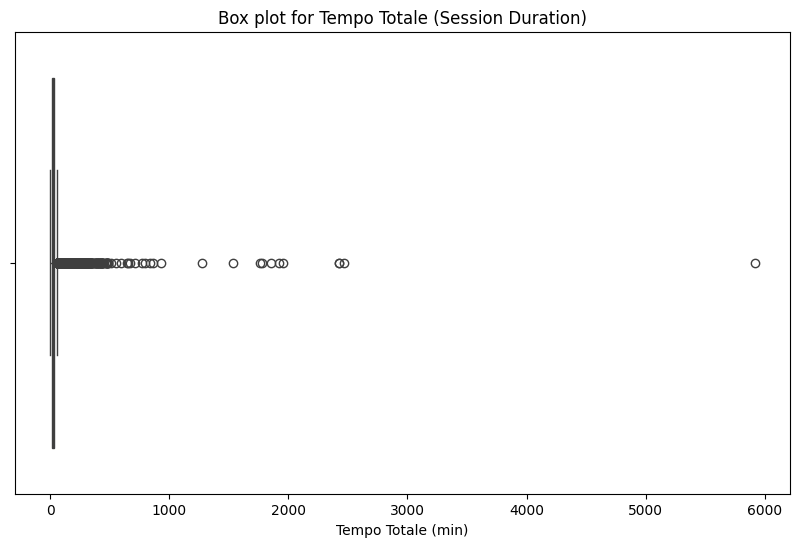

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=cdr['Tempo Totale (min)'])
plt.title('Box plot for Tempo Totale (Session Duration)')
plt.show()

In [17]:
outlier_row = cdr[cdr['Tempo Totale (min)'] > 3000]
print(outlier_row[[ 'EVSE ID', 'Station Nome', 'Ora inizio', 'Ora fine', 'Tempo Totale (min)', 'Energia (kWh)', 'Ricavi totali (€) (IVA esclusa) ']])

                      EVSE ID                      Station Nome  \
274131  IT*F2X*EF2XITMXPC51*3  Aeroporto - Malpensa Commerciale   

                Ora inizio            Ora fine  Tempo Totale (min)  \
274131 1900-01-01 15:02:02 1900-01-01 17:37:19                5915   

        Energia (kWh)  Ricavi totali (€) (IVA esclusa)   
274131         62.328                             28.05  


By printing essential features for this row, we find out that there was a mistake in recording the total time, since the starting and finish hour suggest a duration of about 155 minutes, we will correct it with the .loc function.

In [18]:
cdr.loc[cdr['Tempo Totale (min)'] == 5915, 'Tempo Totale (min)'] = 155.28

/var/folders/nh/9d8r8prn3819gz07wlp9htdw0000gn/T/ipykernel_90188/437561989.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '155.28' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cdr.loc[cdr['Tempo Totale (min)'] == 5915, 'Tempo Totale (min)'] = 155.28


We then proceed to visualize useful insights from the data available. First, we're going to see the average energy consumption per hour of the day, to understand during which time the most powerful charges are made. 

In [ ]:
cdr['Ora inizio'] = pd.to_datetime(cdr['Ora inizio'], errors='coerce')

cdr['Hour of Day'] = cdr['Ora inizio'].dt.hour


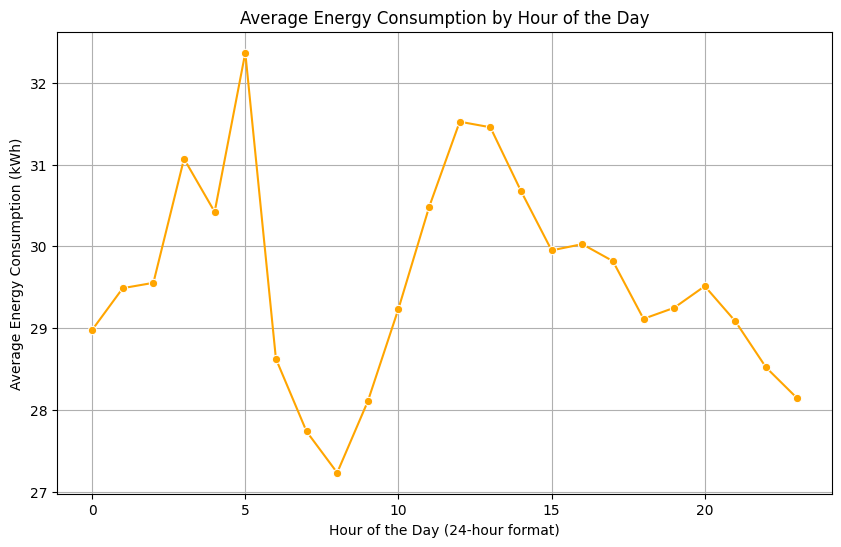

In [ ]:
hourly_avg = cdr.groupby('Hour of Day')['Energia (kWh)'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_avg['Hour of Day'], y=hourly_avg['Energia (kWh)'], marker='o', color='orange')
plt.title('Average Energy Consumption by Hour of the Day')
plt.xlabel('Hour of the Day (24-hour format)')
plt.ylabel('Average Energy Consumption (kWh)')
plt.grid(True)
plt.show()


As we can see, the most powerful charges happen mostly between 10 and 15, with a spike at 5 in the morning. This can be a useful insight when deciding the energy capacity for new charging stations.

In [42]:
hour_popularity = cdr.groupby('Hour of Day').size().reset_index(name='count')


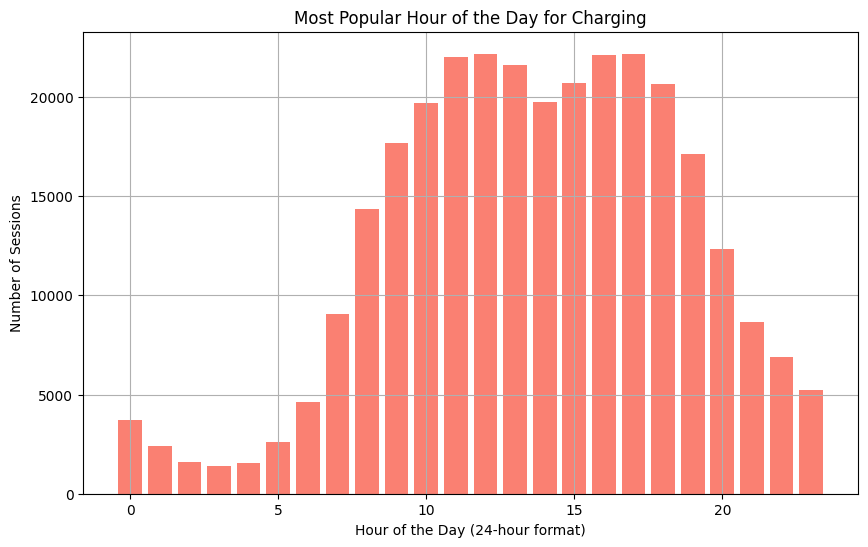

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(hour_popularity['Hour of Day'], hour_popularity['count'], color='salmon')
plt.title('Most Popular Hour of the Day for Charging')
plt.xlabel('Hour of the Day (24-hour format)')
plt.ylabel('Number of Sessions')
plt.grid(True)
plt.show()

Moreover, we visualize the most popular hours of the day. As we can see, the most popular hours are between 10 and 18, which suggests that a successful locatio could be close to supermarkets and malls, typically crowded during the same hours.

Correlation between Hour of Day and Average Session Duration: -0.648879112963712


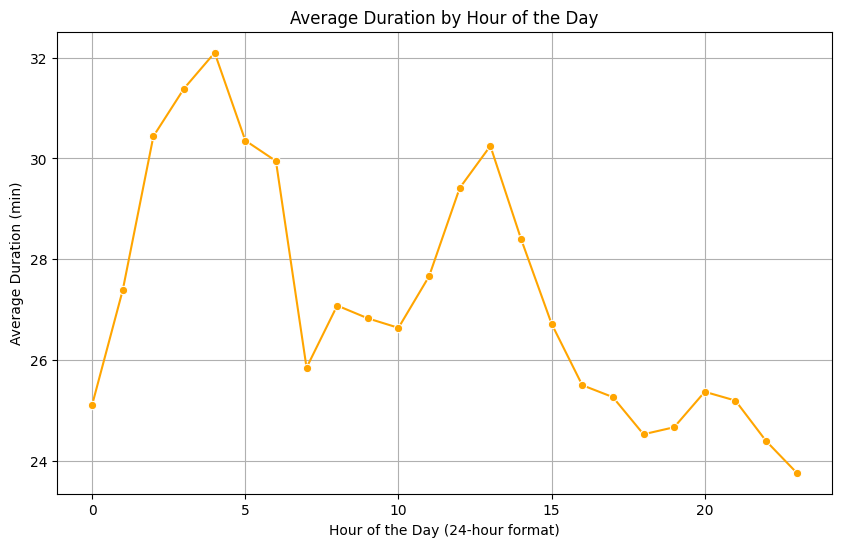

In [43]:
hourly_avg = cdr.groupby('Hour of Day')['Tempo Totale (min)'].mean().reset_index()

correlation = hourly_avg['Hour of Day'].corr(hourly_avg['Tempo Totale (min)'])
print(f"Correlation between Hour of Day and Average Session Duration: {correlation}")


plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_avg['Hour of Day'], y=hourly_avg['Tempo Totale (min)'], marker='o', color='orange')
plt.title('Average Duration by Hour of the Day')
plt.xlabel('Hour of the Day (24-hour format)')
plt.ylabel('Average Duration (min)')
plt.grid(True)
plt.show()

Here we visualized the session duration by time of the day, but we noticed there's no strong correlation.

In [20]:
cdr.to_csv('cdr_cleaned')